## US Consumer Prices Over Time
This is part of a personal project, attempting to recreate charts from The Economist magazine in Python. 
<br>Chart from issue published on 07/23/2023, page 9

Data downloaded from US Bureau of Labor Statistics

In [484]:
import pandas as pd

def pct_infl(data, incl_fe=True, yr_start=1947, yr_end=2023):
    '''
    Descr: Takes CPI data saved as csv from raw text from https://www.bls.gov/cpi/data.htm 
    and produces year/year percentage change (by month, as with all CPI data)
    
    Params: 
    data = filename of text file downloaded from BLS, NOTE - must be saved as .csv (commonly downloaded as .xlsx or .txt)
    incl_fe = (defaults to True) select whether data output should include food and energy prices (True) or not (False)
    yr_start = (defaults to earliest year available in data) the year in which you wish the percentage change data to begin
    yr_end = (defaults to latest year available in the data) the year in which you with the percent data to end
    
    '''
    
    #codes from BLS documentation - thankfully they have already compiled data according to the two most common variables of interest
    if incl_fe is True: prices = 'CWSR0000SA0'
    if incl_fe is False: prices = 'CWSR0000SA0L1E'
    
    df = pd.read_csv(data, sep='\s+', dtype='string')
    
    #this df includes the year prior to requested year (so that we can use it to calculate pct change from prev year)
    df = df[(df['series_id']==prices) & (df['year'].astype('int64')>=(yr_start-1)) & (df['year'].astype('int64')<=yr_end)]
    
    df['date'] = df['year'].astype('string') + df['period'].astype('string')
    df['date'] = df['date'].apply(lambda x: x.replace('M', '-'))
    df['date']=pd.to_datetime(df['date'])
    
    df['value'] = df['value'].astype('float64')

    df['Percent Change from Previous Year'] = (df['value'].pct_change(periods=12))*100
    
    final = df.iloc[:, 5:7].dropna().set_index('date')
    
    return final

dfalltest = pct_infl('cpi_current.csv',True, 2021, 2023)
dfnofetest = pct_infl('cpi_current.csv',False, 2021, 2023)

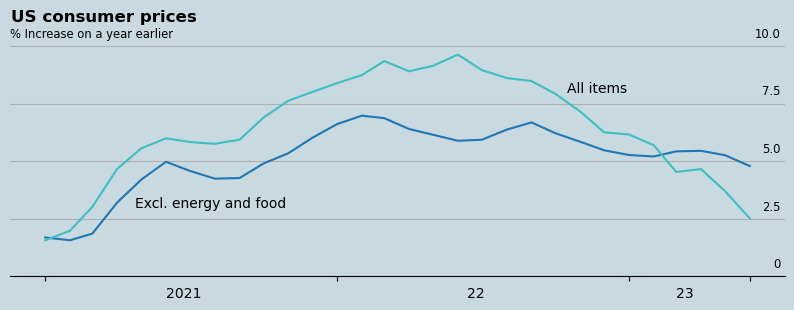

In [491]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#use subplot to get figure and axis objects
fig1,ax = plt.subplots()
fig1.set_size_inches(10,3)

#plot data
ax.plot(dfnofetest)
ax.plot(dfalltest, color='#3dc0c4')

#set Supertitle and Title - manually setting position and formatting to look as desired
plt.suptitle('US consumer prices', x=0.219,y=1, weight='bold')
plt.title('% Increase on a year earlier', loc='left',fontsize='small', wrap=True)

#Get x-axis tick locations, adding the ltick where the data ends for clarity(?)
ax.minorticks_off()
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator()) #use the Yearlocator to get the xaxis values for tick locations
xticks = [tick for tick in ax.xaxis.get_majorticklocs()][1:] #have to slice the list bc the first tick is on '0' from YearLocator
ltick = matplotlib.dates.date2num(dfalltest.index.values.max()) #take max date value and convert to mplt date number, which is the same as the values above
xticks.append(ltick)

#using tick locations, set ticks and labels
ax.set_xticks(ticks=xticks, labels=['2021', '22', '23', ''])

#line labels must be manually located with .annotate
lbl1 = (xticks[2]*.996)
lbl2 = (xticks[0]*1.006)
plt.annotate('All items', (lbl1,8))
plt.annotate('Excl. energy and food', (lbl2,3))

#y-axis tick locations, labels are easier bc values are obivous and =labels. 
ax.set_yticks(ticks = [0, 2.5, 5.0, 7.5, 10], labels = [0, 2.5, 5.0, 7.5, 10.0], ha="right", fontsize='small')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
#turn off actual tick lines 
plt.tick_params(right=False)
#transform the position of y-axis labels so they sit inside the figure and 'ontop' of the gridlines
dx1 = -10/72
dy = 10/72
offset1 = matplotlib.transforms.ScaledTranslation(dx1, dy, fig1.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset1)

#x-axis transform for labels is incredibly finicky, isolating the [2] which is '23' and doesn't need to move as much as the others
dx1 = 40/72
dx2 = 60/72
dy = 0
offset1 = matplotlib.transforms.ScaledTranslation(dx1, dy, fig1.dpi_scale_trans)
offset2 = matplotlib.transforms.ScaledTranslation(dx2, dy, fig1.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform()+offset1)
ax.xaxis.get_majorticklabels()[0].set_transform(label.get_transform() + offset2)
ax.xaxis.get_majorticklabels()[1].set_transform(label.get_transform() + offset2)

#make horizontal gridlines
plt.grid(axis='y')
#get rid of all borders except bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

#set figure and axis facecolors - NOTE alpha values do nothing in this environment?
fig1.set_facecolor('#c8d9e0')
fig1.set_alpha(0.7)
ax.patch.set_facecolor('#c8d9e0')
ax.patch.set_alpha(0.5)

